In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
from google.colab import auth
import gspread
from google.auth import default

In [6]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [7]:
worksheet = gc.open('Dataset').sheet1
data = worksheet.get_all_values()

In [8]:
dataset = pd.DataFrame(data[1:], columns=data[0])
dataset = dataset.astype({'Input':'float'})
dataset = dataset.astype({'Output':'float'})

In [9]:
dataset.head()

,Input,Output
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [10]:
X = dataset[['Input']].values
Y = dataset[['Output']].values

In [11]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33,random_state = 20)

In [13]:
Scaler = MinMaxScaler()

In [14]:
Scaler.fit(x_train)

MinMaxScaler()

In [15]:
x_train_scale = Scaler.transform(x_train)

In [16]:
my_brain = Sequential([
    Dense(units = 4, activation = 'relu' , input_shape=[1]),
    Dense(units = 6),
    Dense(units = 1)

])

In [17]:
my_brain.compile(optimizer='rmsprop',loss='mse')

In [18]:
my_brain.fit(x=x_train_scale,y=y_train,epochs=20000)


Streaming output truncated to the last 5000 lines.
Epoch 15829/20000
1/1 [==============================] - 0s 6ms/step - loss: 997.3456
Epoch 15830/20000
1/1 [==============================] - 0s 6ms/step - loss: 997.3460
Epoch 15831/20000
1/1 [==============================] - 0s 11ms/step - loss: 997.3456
Epoch 15832/20000
1/1 [==============================] - 0s 6ms/step - loss: 997.3461
Epoch 15833/20000
1/1 [==============================] - 0s 6ms/step - loss: 997.3454
Epoch 15834/20000
1/1 [==============================] - 0s 7ms/step - loss: 997.3463
Epoch 15835/20000
1/1 [==============================] - 0s 5ms/step - loss: 997.3454
Epoch 15836/20000
1/1 [==============================] - 0s 5ms/step - loss: 997.3458
Epoch 15837/20000
1/1 [==============================] - 0s 8ms/step - loss: 997.3456
Epoch 15838/20000
1/1 [==============================] - 0s 5ms/step - loss: 997.3461
Epoch 15839/20000
1/1 [==============================] - 0s 5ms/step - loss: 997.3452
Ep

In [19]:
loss_df = pd.DataFrame(my_brain.history.history)

<Axes: >

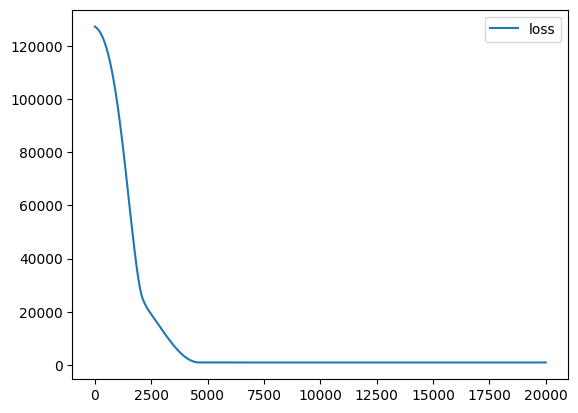

In [20]:
loss_df.plot()

In [21]:
x_test1 = Scaler.transform(x_test)

In [22]:
my_brain.evaluate(x_test1,y_test)

1/1 [==============================] - 0s 141ms/step - loss: 1257.2648


1257.2647705078125

In [23]:
X_n1 = [[30]]

In [24]:
input_scaled = Scaler.transform(X_n1)

In [25]:
input_scaled

array([[1.52631579]])

In [26]:
my_brain.predict(input_scaled)

1/1 [==============================] - 0s 79ms/step


array([[1052.5646]], dtype=float32)